In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(style='darkgrid')
%matplotlib inline

In [12]:
# Data for the algorithm to train on
data = pd.DataFrame({
    'x': np.array([1,2,3,4,5,6,7,8,9,10,11, 12]),
    'y': np.array([25,38,29,115,82,114,120,160,153,190,239,175])
})
data.head()

,x,y
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82


Linear regression formula or equation of the line is given by: y = mx + b <br>
where 'm' is the slope, 'x' is the independent variable, and 'b' is the y intercept<br>
y is the variable we want to predict.<br>
The code in the next cell is the algorithm we are going to create.

In [4]:
def slope(x, y):
    if len(x) != len(y):
        raise ValueError("len(x) is not equal to len(y)")
        
    x, y, n = np.array(x), np.array(y), len(x)
    """
    Formula: nΣxy - ΣxΣy / nΣx^2 - (Σx)^2
    """
    nΣxy = n * np.sum(x * y)
    ΣxΣy = x.sum() * y.sum()
    nΣx_exp2 = n * np.sum(x ** 2)
    Σx_exp2 = x.sum() ** 2
    m = (nΣxy - ΣxΣy) / (nΣx_exp2 - Σx_exp2)
    return np.round(m, 4)


def y_intercept(x, y):
    if len(x) != len(y):
        raise ValueError("len(x) is not equal to len(y)")
    """
    Formula: Σy - mΣx / n
    """
    x, y, n, m = np.array(x), np.array(y), len(x), slope(x, y)
    Σy = y.sum()
    mΣx = m * x.sum()
    b = (Σy - mΣx) / n
    return np.round(b, 4)

In [5]:
# Now lets calculate the slope and y intercept
x, y = data['x'], data['y']
m, b = slope(x, y), y_intercept(x, y)
print('slope:', m)
print('y intercept:', b)

slope: 17.5385
y intercept: 5.9998


<AxesSubplot:xlabel='x', ylabel='y'>

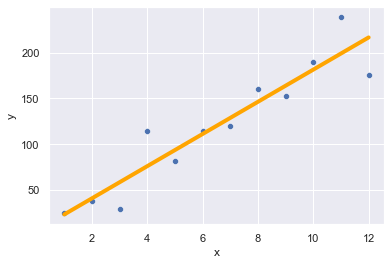

In [15]:
# Now we can plug in the equation and plot the regression line
data['predicted'] = data['x'].map(lambda x: m * x + b)
sns.scatterplot(x='x', y='y', data=data)
sns.lineplot(x='x', y='predicted', color='orange', lw=4, data=data)